# Matrix Factorization Techniques for RS

# Latent factor models

The latent factor models are also based on the user-item preference matrix, but it is not used to calculate the similarity between user or item. Instead, use this matrix to identify hidden factors, such as comedy, tragedy, action, emotion, etc. In the field of film recommendation, which can affect whether a user likes a feature.

Latent factor models typically use matrix decomposition to break down the user-item preference matrix into user and item matrices.

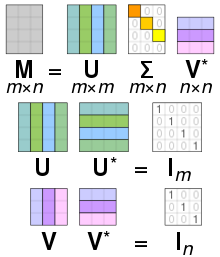

# The main idea of matrix decomposition
Suppose that there is now a matrix of M * N, M represents the number of users, N represents the number of items, and we want to train the user and the item to have two hidden attributes, that is, each user, each item corresponds to a two-dimensional vector, i.e. we get a user latent factor of matrices of M * 2 and N * 2, the decomposition diagram is as follows:

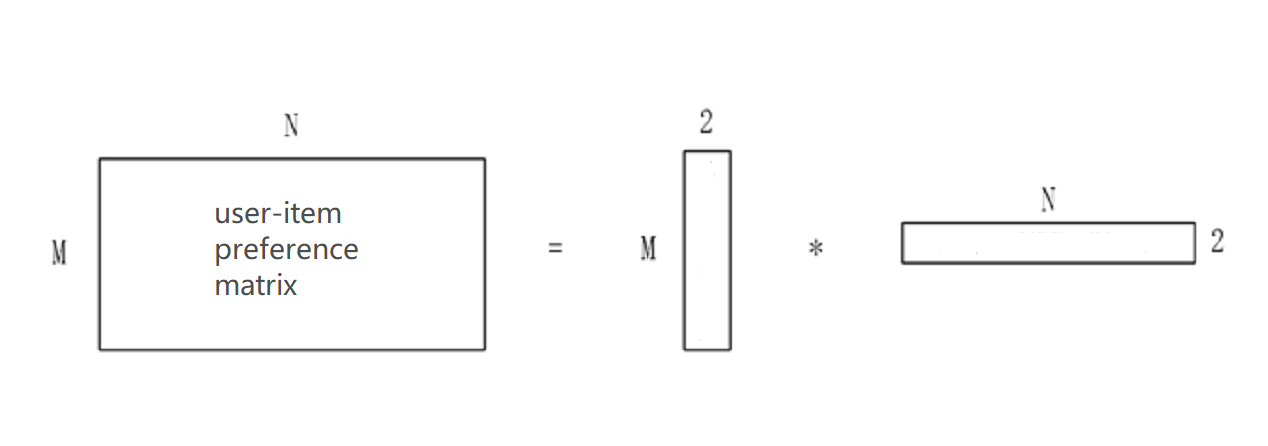

After we obtain the user latent space and the item latent space (both 2-dimensional vectors), we can consider each user, the two-dimensional hidden vector corresponding to the item as a coordinate, and draw it on the axis. Although we get an unexplained latent space, we can give it some meaning to help us understand the result of this decomposition. For example, if we give the two-dimensional hidden vector of users and items to Serious vs. Escapist, Geared towards men, and against women, we can create visual images like those in the paper:

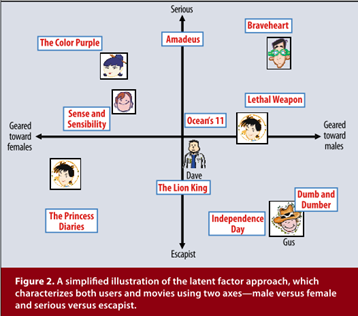

# implicit and explicit data

# model
The resulting dot product,$q_{i}^{T} * p_{u}$, captures the interaction between user
u and item i—the user’s overall interest in
the item’s characteristics.

$$
\hat{r}_{u i}=q_{i}^{T} * p_{u}+b_{u i}
$$

symbol |  description
-- |--
$q_{i}$ | implicit vector of item i
$p_{u}$ | implicit vector of user u
$\boldsymbol{r}_{u i}$ | actual preference score of user u on item i
$\hat{r}_{u i}$ | predict preference score of user u on item i
κ |  κ is the set of the (u,i) pairs for which $r_{u i}$ is known
$\lambda$ | the extent of regularization
$e_{u i}$ | $r_{u i} - q_{i}^{T} * p_{u}$
$b_{u}$ | bias of users
$b_{i}$ | bias of items
$\mu$ | overall averge rating
$b_{u i}$ | $\mu + b_{u} + b_{i}$
$\gamma$ |  magnitude proportiona of gradient when training 


But how can we train the user and item matrices?
The loss function of this model is
$$
\min _{q^{*}, p^{*}} \sum_{(u, i) \in \kappa}\left(r_{u i}-q_{i}^{T} p_{u}\right)^{2}+\lambda\left(\left\|q_{i}\right\|^{2}+\left\|p_{u}\right\|^{2}\right)
$$
According to the paper, we use the Random Gradient Drop (SGD) algorithm to train two hidden vector matrices:
$$
\begin{array}{l}
q_{i}=q_{i}+\gamma *\left(e_{u i} * p_{u}-\lambda * q_{i}\right) \\
p_{u}=p_{u}+\gamma *\left(e_{u i} * q_{i}-\lambda * p_{u}\right)
\end{array}
$$
The function code for the entire SGD looks like this:

In [2]:
def sgd(data_matrix, user, item, alpha, lam, iter_num):

    for j in range(iter_num):
        for u in range(data_matrix.shape[0]):
            for i in range(data_matrix.shape[1]):
                if data_matrix[u][i] != 0:
                    e_ui = data_matrix[u][i] - sum(user[u,:] * item[i,:])
                    user[u,:] += alpha * (e_ui * item[i,:] - lam * user[u,:])
                    item[i,:] += alpha * (e_ui * user[u,:] - lam * item[i,:])
    return user, item

However, due to the differnet tolerance of the audiences, the bias between the users or items need to be taken into account.

$$
\min _{p^{*}, q^{*}, b^{*}} \sum_{(u, i) \in \kappa}\left(r_{u i}-\mu-b_{u}-b_{i}-p_{u}^{T} q_{i}\right)^{2}+\lambda
\left(\left\|p_{u}\right\|^{2}+\left\|q_{i}\right\|^{2}+b_{u}^{2}+b_{i}^{2}\right)
$$
The function code for the SGD with bias looks like this:

In [ ]:
def sgd_bias(data_matrix, user, item, alpha, lam, iter_num, miu):

    b_u = [1] * rating_matrix.shape[0]
    b_i = [1] * rating_matrix.shape[1]
    for j in range(iter_num):
        for u in range(data_matrix.shape[0]):
            for i in range(data_matrix.shape[1]):
                if data_matrix[u][i] != 0:
                    b_ui = b_u[u] + b_i[i] + miu
                    e_ui = data_matrix[u][i] - b_ui - sum(user[u,:] * item[i,:])
                    user[u,:] += alpha * (e_ui * item[i,:] - lam * user[u,:])
                    item[i,:] += alpha * (e_ui * user[u,:] - lam * item[i,:])
                    b_u[u] += alpha * (e_ui - lam * b_u[u])
                    b_i[i] += alpha * (e_ui - lam * b_i[i])
    return user, item, b_u, b_i